# Description
This is an attempt to answer QOSF Mentorship screening task:

## Task 1:
<img src="img/task1.png" align="center"/>

In [1]:
import numpy as np
from qiskit.circuit import ParameterVector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import random_statevector, Statevector
import random
import matplotlib.pyplot as plt

### This function is designed as a generator and used to create one Layer at a time. I find this of a nice way to structure the code. However a lot of the gates are repetitive and I will be workig on way to make this function better

In [13]:
def construct_layer():
    np.random.seed(19680801)
    base_circuit = None
    q = 4
    qr = QuantumRegister(q, 'q')
    qc = QuantumCircuit(qr)
    while True:
        theta = [random.uniform(0, 2*np.pi) for _ in range(q*2)]
        theta_i = iter(theta) 
        # ODD blocks
        qc.rx(next(theta_i),0)
        qc.rx(next(theta_i),1)
        qc.rx(next(theta_i),2)
        qc.rx(next(theta_i),3)
        # Even Blocks 
        qc.rx(next(theta_i),0)
        qc.rx(next(theta_i),1)
        qc.rx(next(theta_i),2)
        qc.rx(next(theta_i),3)
        qc.cz(0,1)
        qc.cz(0,2)
        qc.cz(0,3)
        qc.cz(1,2)
        qc.cz(1,3)
        qc.cz(2,3)
        min_angle = min(theta)
        if base_circuit is None:
            base_circuit = qc
            yield base_circuit, min_angle
        yield base_circuit.combine(qc), min_angle

### In this section I am creating a circuits with a given a number L. In addition I am applying the min_distance formula in the problem description to calculate the min_distance

In [11]:
L = 10
phi =  random_statevector(dims=(2, 2, 2, 2))
psi = Statevector.from_label('0000')
x_axis = []
y_axis = []
for i,(circuit,min_angle)  in enumerate(construct_layer(), 1):
    if i == 1:
        min_theta = min_angle
    else:
        min_theta = min(min_theta, min_angle)
    if i > L:
        break
    ret = psi.evolve(circuit)
    min_distance = min_theta* np.linalg.norm(psi.data-ret.data)**2
    x_axis.append(i)
    y_axis.append(min_distance)

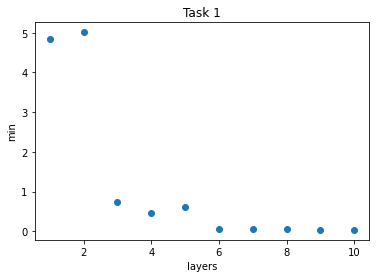

In [6]:
plt.xlabel('layers')
plt.ylabel('min')
plt.title('Task 1')
plt.plot(x_axis ,y_axis, 'o' )

### Bonus Question

I repeated step 2/3 by changing qc.rx -> to qc.ry

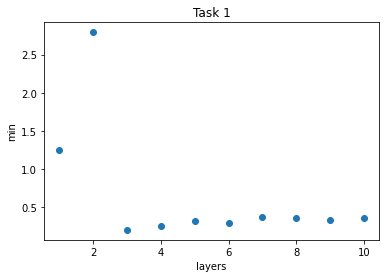

In [12]:
plt.xlabel('layers')
plt.ylabel('min')
plt.title('Task 1')
plt.plot(x_axis ,y_axis, 'o' )